<a href="https://colab.research.google.com/github/phule1812/iurc2/blob/master/second_step_current.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
# drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

In [2]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path/ 'dataset'

if image_path.is_dir():
  print(f'{image_path} directory already exists ... ')
else:
  print(f'{image_path} does not exist, creatin one ...')
  image_path.mkdir(parents = True, exist_ok = True)

# Download dataset
with open(data_path / 'dataset.zip', 'wb') as f:
  request = requests.get('https://github.com/phule1812/iurc2/raw/master/dataset.zip')
  print('Downloading dataset ...')
  f.write(request.content)

# Unzip dataset
with zipfile.ZipFile(data_path / "dataset.zip", 'r') as zip_ref:
  print('Unzipping dataset ...')
  zip_ref.extractall(image_path)

data/dataset does not exist, creatin one ...
Unzipping dataset ...


In [3]:
df = pd.read_csv('data/dataset/dataset/current.csv')
df_red = pd.read_csv('data/dataset/dataset/current_red.csv')
df_green = pd.read_csv('data/dataset/dataset/current_green.csv')
df_blue = pd.read_csv('data/dataset/dataset/current_blue.csv')

In [4]:
df = df.drop(columns = 'Unnamed: 0')
df_red = df_red.drop(columns = 'Unnamed: 0')
df_green = df_green.drop(columns = 'Unnamed: 0')
df_blue = df_blue.drop(columns = 'Unnamed: 0')

In [5]:
df = df[['I1', 'I2', 'I3']]
df_red = df_red[['I1', 'I2', 'I3']]
df_green = df_green[['I1', 'I2', 'I3']]
df_blue = df_blue[['I1', 'I2', 'I3']]

In [6]:
df.head()

,I1,I2,I3
0,0.488095,0.709957,0.664165
1,0.425032,0.857287,0.653846
2,0.394962,0.970985,0.647837
3,0.400314,0.995885,0.561859
4,0.392505,1.105096,0.562024


In [7]:
df_red.head()

,I1,I2,I3
0,0.806071,0.932110,0.905566
1,0.785425,1.053394,0.826340
2,0.720061,1.123137,0.694639
3,0.812929,1.206553,0.781279
4,0.677186,1.239886,0.739672


In [8]:
df_blue.head()

,I1,I2,I3
0,0.446065,0.465365,0.424908
1,0.498974,0.555301,0.384173
2,0.424501,0.650794,0.430652
3,0.302432,0.657343,0.347578
4,0.429060,0.759198,0.342342


In [9]:
df_green.head()

,I1,I2,I3
0,0.382385,0.381999,0.352913
1,0.580128,0.482784,0.367948
2,0.322916,0.539331,0.374542
3,0.307692,0.551856,0.320070
4,0.349112,0.575236,0.249084


In [10]:
df_red = df_red.rename(columns = {'I3' : 'I3_red', 'I1' : 'I1_red', 'I2' : 'I2_red'})

In [11]:
df_green = df_green.rename(columns = {'I3' : 'I3_red', 'I1' : 'I1_red', 'I2' : 'I2_red'})

In [12]:
df_blue = df_blue.rename(columns = {'I3' : 'I3_blue', 'I1' : 'I1_blue', 'I2' : 'I2_blue'})

In [13]:
df_red.head()

,I1_red,I2_red,I3_red
0,0.806071,0.932110,0.905566
1,0.785425,1.053394,0.826340
2,0.720061,1.123137,0.694639
3,0.812929,1.206553,0.781279
4,0.677186,1.239886,0.739672


In [14]:
df_green.head()

,I1_red,I2_red,I3_red
0,0.382385,0.381999,0.352913
1,0.580128,0.482784,0.367948
2,0.322916,0.539331,0.374542
3,0.307692,0.551856,0.320070
4,0.349112,0.575236,0.249084


In [15]:
df_blue.head()

,I1_blue,I2_blue,I3_blue
0,0.446065,0.465365,0.424908
1,0.498974,0.555301,0.384173
2,0.424501,0.650794,0.430652
3,0.302432,0.657343,0.347578
4,0.429060,0.759198,0.342342


##Calculate Ix, Iy and If with this formula

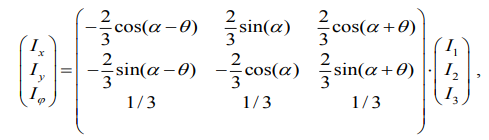

In this formula:
* L = 125
* R = 40
* theta = 30 deg
* alpha = 0

In [16]:
L = 125
R = 40
theta = 2*np.pi*30/360
alpha = 0

In [17]:
convert_matrix = [[-2/3 * np.cos(alpha - theta), 2/3 * np.sin(alpha), 2/3 *np.cos(alpha + theta)],
                  [-2/3 * np.sin(alpha - theta), -2/3 * np.cos(alpha), 2/3 * np.sin(alpha + theta)],
                  [1/3, 1/3, 1/3]]

In [18]:
df_green.iloc[0].to_numpy()

array([0.38238543, 0.38199863, 0.35291342])

In [19]:
np.dot(convert_matrix, df_green.iloc[0].to_numpy())

array([-0.01701568, -0.00956614,  0.3724325 ])

In [20]:
df_green.T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
I1_red,0.382385,0.580128,0.322916,0.307692,0.349112,0.558405,0.378510,0.380876,0.366130,0.357420,...,0.636811,0.585898,0.558069,0.552094,0.617464,0.711332,0.609649,0.568071,0.627480,0.527709
I2_red,0.381999,0.482784,0.539331,0.551856,0.575236,0.425641,0.485958,0.542260,0.540143,0.777778,...,0.433925,0.571992,0.557387,0.575321,0.736597,0.454292,0.495513,0.513788,0.537010,0.576662
I3_red,0.352913,0.367948,0.374542,0.320070,0.249084,0.312602,0.360042,0.287545,0.283401,0.276353,...,0.774500,0.726265,0.764569,0.747512,0.764726,0.775101,0.765568,0.775867,0.748792,0.756244


In [21]:
convertor = np.dot(convert_matrix, df_green.T.to_numpy())

In [22]:
df_green_converted = pd.DataFrame(convertor.T)
df_green_converted.head()

,0,1,2
0,-0.017016,-0.009566,0.372432
1,-0.122502,-0.005830,0.476953
2,0.029806,-0.127068,0.412263
3,0.007147,-0.158650,0.393206
4,-0.057751,-0.184092,0.391144


In [23]:
def convertor(df_original):
  convert_matrix = [[-2/3 * np.cos(alpha - theta), 2/3 * np.sin(alpha), 2/3 *np.cos(alpha + theta)],
                  [-2/3 * np.sin(alpha - theta), -2/3 * np.cos(alpha), 2/3 * np.sin(alpha + theta)],
                  [1/3, 1/3, 1/3]]

  convertion = np.dot(convert_matrix, df_original.T.to_numpy())
  df_converted = pd.DataFrame(convertion.T)

  return df_converted

In [24]:
df_green_converted = convertor(df_green)
df_green_converted.columns = ['I_green_x', 'I_green_y', 'I_green_f']
df_green_converted.head()

,I_green_x,I_green_y,I_green_f
0,-0.017016,-0.009566,0.372432
1,-0.122502,-0.005830,0.476953
2,0.029806,-0.127068,0.412263
3,0.007147,-0.158650,0.393206
4,-0.057751,-0.184092,0.391144


In [25]:
df_red_converted = convertor(df_red)
df_red_converted.columns = ['I_red_x', 'I_red_y', 'I_red_f']
df_red_converted.head()

,I_red_x,I_red_y,I_red_f
0,0.057443,-0.050861,0.881249
1,0.023622,-0.165007,0.888386
2,-0.014677,-0.277191,0.845945
3,-0.018273,-0.272966,0.933587
4,0.036076,-0.354305,0.885582


In [26]:
df_blue_converted = convertor(df_blue)
df_blue_converted.columns = ['I_blue_x', 'I_blue_y', 'I_blue_f']
df_blue_converted.head()

,I_blue_x,I_blue_y,I_blue_f
0,-0.012215,-0.019919,0.445446
1,-0.066281,-0.075818,0.479483
2,0.003551,-0.148811,0.501982
3,0.026065,-0.221559,0.435784
4,-0.050066,-0.248998,0.510200


In [27]:
df_converted = convertor(df)
df_converted.columns = ['I_x', 'I_y', 'I_f']
df_converted.head()

,I_x,I_y,I_f
0,0.101654,-0.089218,0.620739
1,0.132106,-0.211899,0.645389
2,0.145998,-0.299724,0.671261
3,0.093268,-0.343199,0.652686
4,0.097872,-0.418555,0.686542


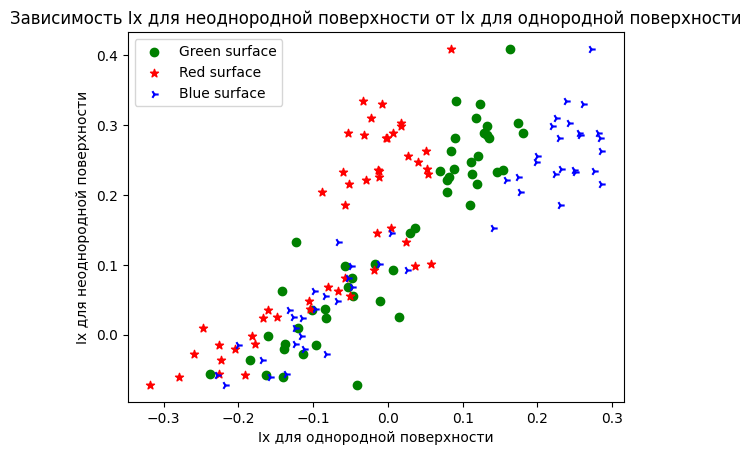

In [28]:
fig, ax = plt.subplots()
x1 = df_green_converted['I_green_x']
x2 = df_red_converted['I_red_x']
x3 = df_blue_converted['I_blue_x']
y = df_converted['I_x']
ax.scatter(x1, y, color = 'green', marker = 'o', label = 'Green surface')
ax.set_ylabel('Ix для неоднородной поверхности')
ax.set_xlabel('Ix для однородной поверхности')
ax.scatter(x2, y, marker = '*', color = 'red', label = 'Red surface')
ax.scatter(x3, y, marker = '4', color = 'blue', label = 'Blue surface')
ax.set_title('Зависимость Ix для неоднородной поверхности от Ix для однородной поверхности')

ax.legend()
plt.show()


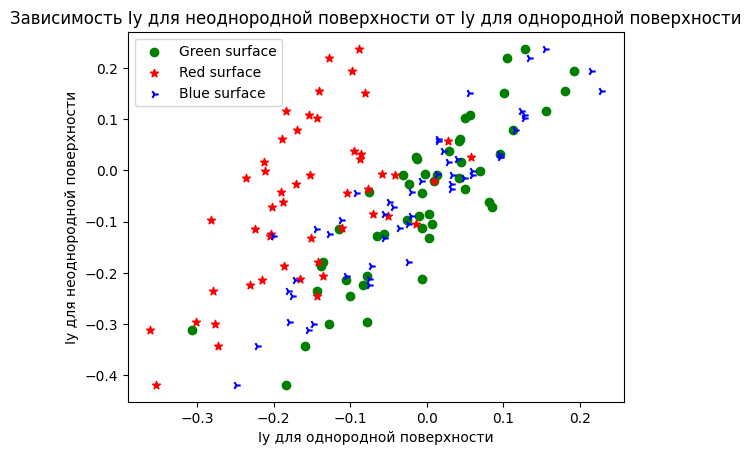

In [29]:
fig, ax = plt.subplots()
x1 = df_green_converted['I_green_y']
x2 = df_red_converted['I_red_y']
x3 = df_blue_converted['I_blue_y']
y = df_converted['I_y']
ax.scatter(x1, y, color = 'green', marker = 'o', label = 'Green surface')
ax.set_ylabel('Iy для неоднородной поверхности')
ax.set_xlabel('Iy для однородной поверхности')
ax.scatter(x2, y, marker = '*', color = 'red', label = 'Red surface')
ax.scatter(x3, y, marker = '4', color = 'blue', label = 'Blue surface')
ax.legend()
ax.set_title('Зависимость Iy для неоднородной поверхности от Iy для однородной поверхности')
plt.show()

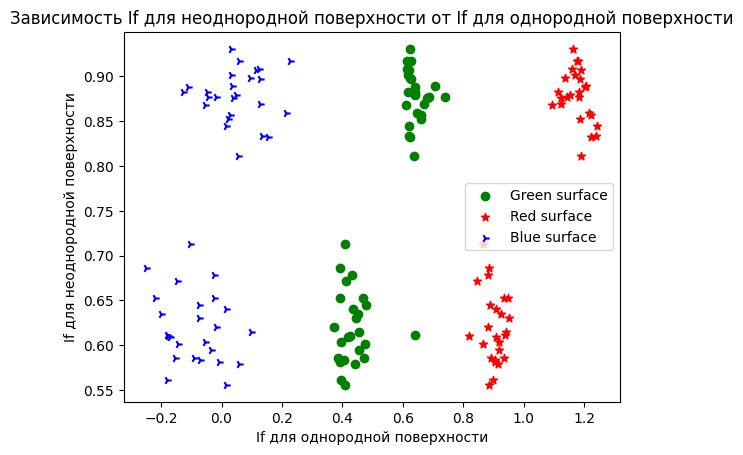

In [30]:
fig, ax = plt.subplots()
x1 = df_green_converted['I_green_f']
x2 = df_red_converted['I_red_f']
y = df_converted['I_f']
ax.scatter(x1, y, color = 'green', marker = 'o', label = 'Green surface')
ax.set_ylabel('If для неоднородной поверхности')
ax.set_xlabel('If для однородной поверхности')
ax.scatter(x2, y, marker = '*', color = 'red', label = 'Red surface')
ax.scatter(x3, y, marker = '4', color = 'blue', label = 'Blue surface')
ax.set_title('Зависимость If для неоднородной поверхности от If для однородной поверхности')
ax.legend()
plt.show()